O objetivo desse projeto é utilizar Redes Neuras Convulucionais (CNN) para a classificação de objetos de uma base de imagens bastante conhecida "CIFAR-10", que possui mais de 60.000 dados de imagens 32x32 contendo as seguintes categorias de imagens: avião, automóvel, passáro, gato, veado, cachorro, sapo, cavalo, navio e caminhão.
Ao longo do projeto, vamos utilizar diferentes CNN, como a VGG16, VGG19, ResNet50, aplicando diferentes ténicas para melhorar o modelo, como Data Augmentation, que é capaz de realizar pequenas alterações nas imagens a fim de obter mais variações para o treinamento, ténicas de TransferLearning, que é capaz de utilizar um modelo que já foi treinado com o objetivo de poupar recursos para treinar novos modelos e também aproveitar seu desempenho.
Então nosso projeto consiste nas seguintes etapas:


- Carregar dados
- Definir modelo Keras
- Compilar modelo Keras
- Ajustar (fit) modelo Keras
- Avaliar (evaluate) modelo Keras
- Previsão

Realizando as importações necessárias para iniciar o projeto, e ocultando possíveis warnings que são relevantes para o projeto.

In [ ]:
import os
import warnings

warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Carregando os dados da base CIFAR-10 e separando as imagens em treino e teste para realizar o treinamento do modelo e a avaliação da performance.

In [ ]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Visualizando as primeiras imagens do Dataset com Matplotlib bem como o shape das Imagens. É possível perceber que as imagens estão em baixa resolução e o shape contém 60 mil amostras 32x32 com 3 canais de cores, que é o RGB.


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= IMAGENS CIFAR-10 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



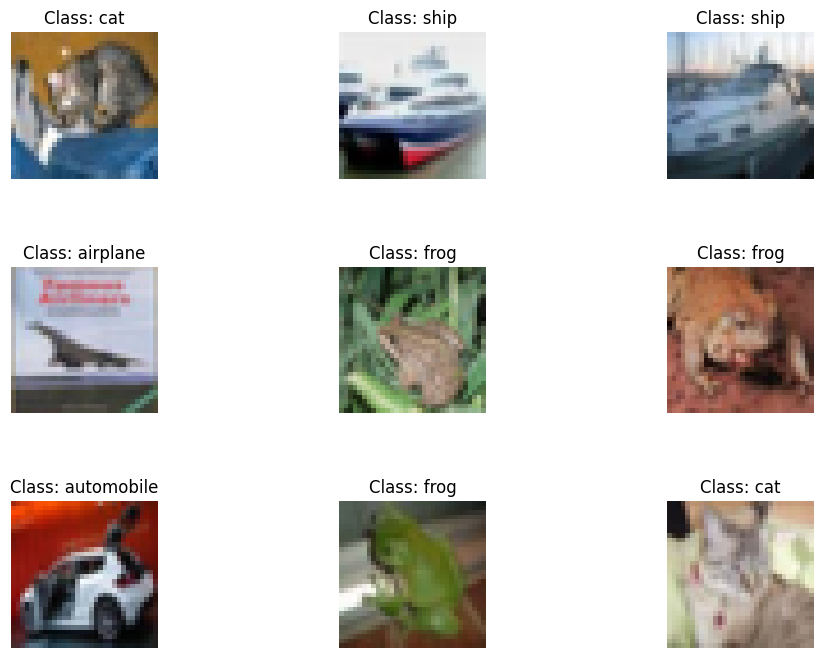


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= SHAPE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Amostras de Treino:  (50000, 32, 32, 3)
Amostras de Teste:  (50000, 1)


In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Class: {class_names[y_test[i][0]]}")
    ax.axis("off")


fig.subplots_adjust(hspace=0.6)
print()
print('-='*30, 'IMAGENS CIFAR-10', '-='*30)
print()
plt.show()
print()
print('-='*30, 'SHAPE', '-='*30)
print()
print('Amostras de Treino: ', X_train.shape)
print('Amostras de Teste: ', y_train.shape)

### Normalizando o conjunto de dados X

#### O conjunto de dados X_train e X_test não possui valores normalizados, variando de 0 a 255, para normalizar os dados vamos dividi-los por 255 para os valores ficarem entre 0 e 1.

In [ ]:
X_train = (X_train.astype('float32') / 255.)
X_test = (X_test.astype('float32') / 255.)

### Transformar o y_test, e y_train em to_categorical:
#### O y_test e o y_train estão representando o índice da imagem que se trata o conjunto de dados, para o modelo treinado não identificar no treinamento alguma relação dos índices, vamos aplicar o one_hot com a ideia de binarizar a classificação da imagem. Por exemplo, o conjunto X' é um gato, que é representado pelo índice 3, quando aplicamos o one_hot o gato será representado pelo seguinte array: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], ou seja, atribui o valor 1 no índice 3 que é classificado para o gato e 0 para os demais. Essa técnicas pode melhorar o desemepenho do nosso modelo para o modelo não identificar relações na nossa variável target que não existe.


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Definindo a arquitetura do modelo com Keras
#### Primeiramente, vamos utilizar um modelo bem simples com 8 camadas e 204.602 parâmetros, aplicando técnicas de regularização, como o Dropout, que consiste em aplicar um "esquecimento" de neurônios com o objetivo da rede não depender e dar um peso alto para algum neurônio, também aplicar o MaxPooling para reduzir a dimensionalidade das feature map e coletando as características mais ativas.

#### Também, vamos inicializar os pesos dos neurônios aleatoriamente com o parâmetro "kernel_initializer", pois quando aplicar o Gradiente, técnica para a variação dos pesos para a redução da função custo, não possuir a mesma variancia para todos os parâmetros, caso contrário todos os pesos seriam alterados da mesma forma.

In [ ]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="valid"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(80, kernel_initializer='glorot_uniform', activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, kernel_initializer='glorot_uniform', activation="softmax"))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 80)                  │         250,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,162 (1.03 MB)

 Trainable params: 271,162 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

#### Definir nosso otimizador do Gradiente, a métrica e a função custo e treinamento o modelo.
#### Aplicando um batch size de 200 amostras para calcular o custo e com 10 épocas para atualização dos pesos. O parâmetro validation_data com verbose=1, serve para o modelo testar em cada época a sua performance com os dados de teste e msotrar na tela.

In [ ]:
optimizer = keras.optimizers.Adam(beta_1=0.8)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[metric],
)

hist = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - categorical_accuracy: 0.2833 - loss: 1.9487 - val_categorical_accuracy: 0.4899 - val_loss: 1.4440
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - categorical_accuracy: 0.4808 - loss: 1.4377 - val_categorical_accuracy: 0.5319 - val_loss: 1.3093
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.5387 - loss: 1.3021 - val_categorical_accuracy: 0.5882 - val_loss: 1.1616
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.5738 - loss: 1.2014 - val_categorical_accuracy: 0.6040 - val_loss: 1.1249
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.6023 - loss: 1.1246 - val_categorical_accuracy: 0.6232 - val_loss: 1.1051
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - categorical_accuracy: 0.6248 - loss: 1.0713 - val_categorical_accuracy: 0.6506 - val_loss: 1.0118
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - categorical_accuracy: 0.6384 - lo

#### Com esse modelo simples foi possível atingir uma acurácia de 68%.
#### Vamos visualizar de forma gŕafica o desempenho do treinamento. É possível visualizar que a acurácia de teste performou melhor que a do treino, o que é muito bom para o modelo.

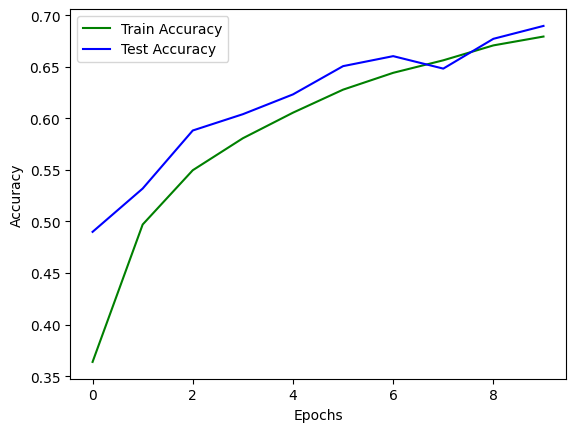

In [ ]:
acc_train = hist.history['categorical_accuracy']
acc_test = hist.history['val_categorical_accuracy']

plt.plot(acc_train, '-g', label='Train Accuracy')
plt.plot(acc_test, '-b', label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Aumentando artificialmente o conjunto de dados CIFAR-10
#### Com a técnicas data augmentation, é possível fazer pequenas variações nas imagens de treinamento, com o objetivo do modelo perceber outros padrões que se comportam como uma nova imagem. Entre essas alterações podem incluir: Zoom, Deslocamento da imagem e Rotação, que serão aplicadas em cada época do treinamento. É importante inicializar novamente a arquitetura antes.

In [ ]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(120, kernel_initializer='glorot_uniform', activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, kernel_initializer='glorot_uniform', activation="relu"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          15,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,698 (1.16 MB)

 Trainable params: 303,698 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data augmentation
aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
aug_train = aug_data.flow(X_train, y_train, batch_size=200)

# Define optimizer, loss, and metrics
optimizer = keras.optimizers.Adam(beta_1=0.8)  # Adjusted beta_1, default is 0.9
loss = keras.losses.CategoricalCrossentropy()
metrics = [keras.metrics.CategoricalAccuracy()]  # Use a list

# Compile model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

# Number of steps per epoch
n_steps = X_train.shape[0] // 200

# Train the model
hist = model.fit(
    aug_train,
    steps_per_epoch=n_steps,
    epochs=70,
    validation_data=(X_test, y_test),  # No need for batch_size here
    verbose=1
)


Epoch 1/70
 16/250 ━━━━━━━━━━━━━━━━━━━━ 3:27 887ms/step - categorical_accuracy: 0.0865 - loss: 4.5684

KeyboardInterrupt: 

### Esse modelo atingiu 83% de acurácia nos dados de teste

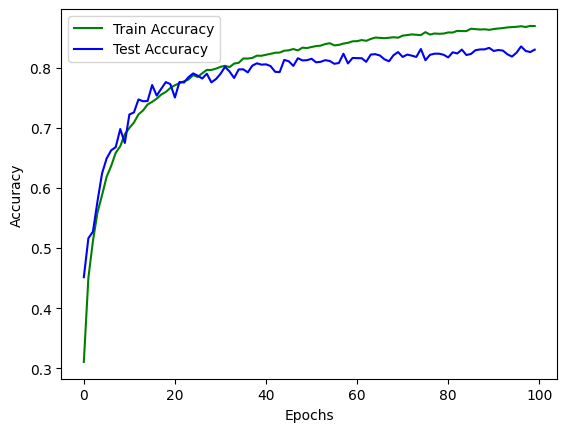

In [ ]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(acc_train, '-g', label='Train Accuracy')
plt.plot(acc_test, '-b', label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Testando com outros modelos: VGG19, ResNet50.
#### Vamos aplicar diferentes técnicas para utilizar o VGG19 e o ResNet50, uma deles é o early stopping com o parâmetro from epoch, essa técnica visa parar o modelos, caso uma condição de performance seja atingida, como o custo não variar muito. E o from epoch é quando utilizamos o Transfer Learning, para não interromper o treinamento cedo demais, então o early_stopping só vai ser aplicada quando passar pela época definida.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=1E-3,
    verbose=1,
    start_from_epoch=70

)

hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0770 - sparse_categorical_accuracy: 0.6252 - val_loss: 1.0940 - val_sparse_categorical_accuracy: 0.6338
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0652 - sparse_categorical_accuracy: 0.6289 - val_loss: 1.0516 - val_sparse_categorical_accuracy: 0.6451
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.0496 - sparse_categorical_accuracy: 0.6344 - val_loss: 1.0390 - val_sparse_categorical_accuracy: 0.6509
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.0451 - sparse_categorical_accuracy: 0.6365 - val_loss: 1.0098 - val_sparse_categorical_accuracy: 0.6651
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0384 - sparse_categorical_accuracy: 0.6380 - val_loss: 0.9640 - val_sparse_categorical_accuracy: 0.6750
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.0310 - sparse_categorical_accuracy: 0.6444 - val_loss: 1.0510 - val_sparse_categorical_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8876 - sparse_categorical_accuracy: 0.7217


[0.8868820071220398, 0.7226999998092651]

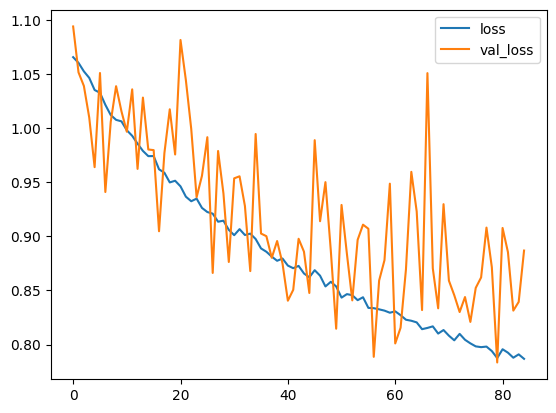

In [ ]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

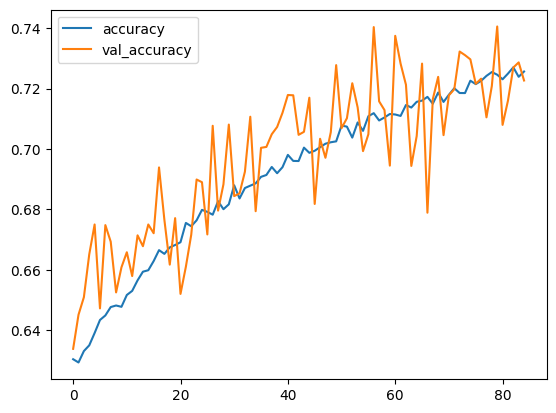

In [ ]:
plt.plot(hist.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(hist.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(4, 5, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Class: {class_names[y_test[i][0]]}", pad=15)
    ax.axis("off")

    pred = model.predict(np.expand_dims(X_test[i], axis=0), verbose=0)[0]
    ax.text(
        16,
        -2.5,
        f"Predict: {class_names[pred.argmax()]} - {pred.max():.2%}",
        color="green" if pred.argmax() == y_test[i][0] else "red",
        verticalalignment="center",
        horizontalalignment="center",
        fontsize=9
    )
fig.subplots_adjust(hspace=0.6)

plt.show()

In [ ]:
LEARNING_RATE = 1E-3
EPOCHS = 10
BATCH_SIZE = 256

LEARNING_RATE_TUNING = 1E-4
EPOCHS_TUNING = 15
BATCH_SIZE_TUNING = 128

In [ ]:
base_model = VGG19(
    include_top=False,
    input_shape=(32, 32, 3),
)
base_model.trainable = False
base_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(base_model)
model.add(keras.layers.UpSampling2D(size=(7, 7)))
model.add(keras.layers.GlobalMaxPooling2D())
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary(show_trainable=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ vgg19 (Functional)                  │ (None, 1, 1, 512)            │    20,024,384 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ up_sampling2d_1 (UpSampling2D)      │ (None, 7, 7, 512)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_max_pooling2d                │ (None, 512)                  │             0 │    -    │
│ (GlobalMaxPooling2D)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 128)                  │        65,664 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_1 (Dropout)                 │ (None, 128)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 128)                  │        16,512 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_2 (Dropout)                 │ (None, 128)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_3 (Dense)                     │ (None, 10)                   │         1,290 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,107,850 (76.71 MB)

 Trainable params: 83,466 (326.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[metric]
)

X_train_preprocess = preprocess_input(X_train)
X_test_preprocess = preprocess_input(X_test)


early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=1E-4,
    verbose=1,
    start_from_epoch=150
)

hist = model.fit(
    X_train,
    y_train,
    epochs=7,
    batch_size=512,
    validation_data=(X_test, y_test),
    #callbacks=[early_stopping],
)

### Ajuste dos parâmetros

In [ ]:
#base_model.trainable = True
#model.summary(show_trainable=True)
optimizer = keras.optimizers.Adam(learning_rate=1E-4)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[metric]
)

hist = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test),
    #callbacks=[early_stopping],
)

model.evaluate(X_test_preprocess, y_test)